In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Set seed for reproducible results
np.random.seed(414)

# Gen toy data
X = np.linspace(0, 15, 1000)
y = 3 * np.sin(X) + np.random.normal(1 + X, .2, 1000)

train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

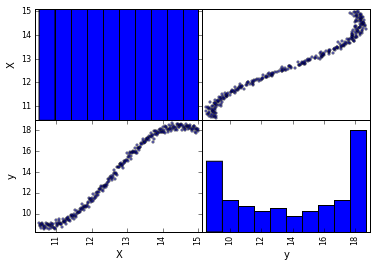

In [6]:
# Linear Fit
poly_1 = smf.ols(formula='y ~ 1 + X', data=train_df).fit()
graph = pd.scatter_matrix(test_df)


In [ ]:
# Quadratic Fit
poly_1 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=train_df).fit()
poly_1.summary